In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score

In [2]:
#Import dataframe from JSON file
jsonStr = "parameters_df.json"
df = pd.read_json(jsonStr, orient ='index')
print(df.head)

<bound method NDFrame.head of                                                    red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.8076  2.7112   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.0908  2.7464   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.2704  2.6620   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.2452  2.8940   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  2.5404  3.0032   
...                                                ...     ...     ...   
data/10295/1/10295_idx5_x1451_y1751_class1.png  2.4984  2.5208  2.3112   
data/10295/1/10295_idx5_x1251_y1751_class1.png  2.3984  2.4816  2.4340   
data/10295/1/10295_idx5_x1501_y1351_class1.png  2.3928  2.6456  2.5132   
data/10295/1/10295_idx5_x1501_y1601_class1.png  2.7404  2.3744  2.5352   
data/10295/1/10295_idx5_x1251_y1851_class1.png  2.3600  2.1736  2.9432   

                                                    gray  group  
data/12910/0/12

In [27]:
X= df[['red','green','blue','gray']]
y=df['group']
  
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.3, shuffle=False)

print('X_train : ')
print(X_train.head())
print(X_train.shape)
print('')
print('X_test : ')
print(X_test.head())
print(X_test.shape)
print('')
print('y_train : ')
print(y_train.head())
print(y_train.shape)
print('')
print('y_test : ')
print(y_test.head())
print(y_test.shape)

X_train : 
                                                   red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.8076  2.7112   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.0908  2.7464   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.2704  2.6620   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.2452  2.8940   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  2.5404  3.0032   

                                                    gray  
data/12910/0/12910_idx5_x3001_y701_class0.png   0.755730  
data/12910/0/12910_idx5_x1501_y401_class0.png   0.483340  
data/12910/0/12910_idx5_x2251_y1101_class0.png  0.799321  
data/12910/0/12910_idx5_x2551_y1151_class0.png  0.824825  
data/12910/0/12910_idx5_x2001_y101_class0.png   0.675241  
(19642, 4)

X_test : 
                                                 red   green    blue      gray
data/9225/0/9225_idx5_x1451_y151_class0.png   2.1432  2.3612  2.4404  0.662782
data/9225/

[0 0 0 ... 1 1 1]
12764
6878
Gini : -42902.38367346939
Accuracy is:  0.6420002375579047


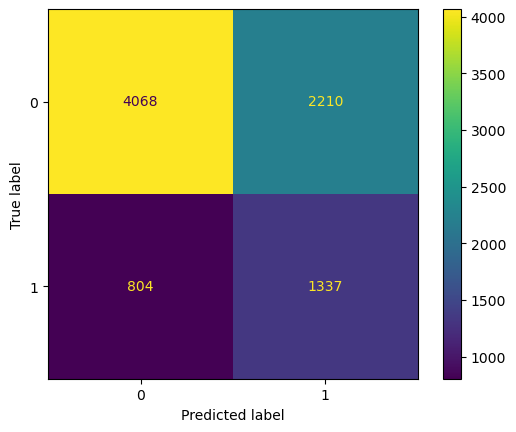

In [33]:
#Single decision tree
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

predicted_value = model.predict(X_test)
print(predicted_value)

#To plot the actual decision tree
#tree.plot_tree(model)

zeroes = 0
ones = 0

for i in y_train:
    if i == 0:
        zeroes += 1
    else:
        ones += 1

print(zeroes)
print(ones)

val = 1 - ((zeroes/70)*(zeroes/70) + (ones/70)*(ones/70))
print("Gini :", val)

match = 0
UnMatch = 0

for i in range(len(predicted_value)):
    if predicted_value[i] == y_test[i]:
        match += 1
    else:
        UnMatch += 1

accuracy = match/len(predicted_value)
print("Accuracy is: ", accuracy)

ConfusionMatrixDisplay(confusion_matrix(y_test, predicted_value)).plot()

[0 0 0 ... 1 1 1]
accuracy on training set: 1.000000
accuracy on test set: 0.727284


0.7272835253593063

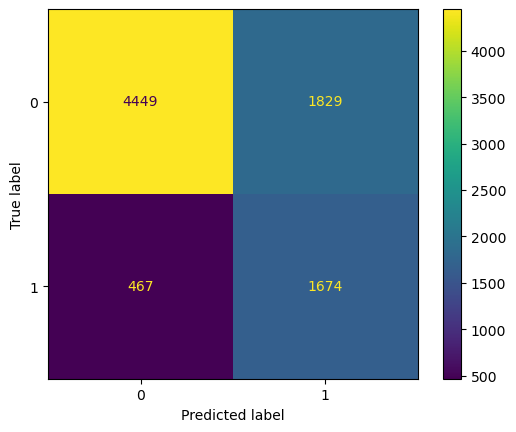

In [30]:
#Random forest classification
regressor = RandomForestClassifier(random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test)  # test the output by changing values
print(y_pred)

print("accuracy on training set: %f" % regressor.score(X_train, y_train))
print("accuracy on test set: %f" % regressor.score(X_test, y_test))

# Create confusion matrix
confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion).plot()
# Display accuracy score
accuracy_score(y_test, y_pred)

In [17]:
# Visualising the Random Forest Regression results

# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
X_grid = np.arange(min(float(X_train)), max(float(X_train)), 0.01)

# reshape for reshaping the data into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value				
X_grid = X_grid.reshape((len(X_grid), 1))

# Scatter plot for original data
plt.scatter(x, y, color = 'blue')

# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid),color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

TypeError: float() argument must be a string or a number, not 'DataFrame'